In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.model_selection import train_test_split

In [58]:
df = pd.read_csv('flight_delays 1.csv', header = 0, sep=',')

In [59]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


In [60]:
df_delay = df[df.dep_delayed_15min==1]
df_nodelay = df[df['dep_delayed_15min']==0]
delays = len(df_delay)
nodelays = len(df_nodelay)
airlines = sorted(df.UniqueCarrier.unique())
origins= sorted(df.Origin.unique(), reverse=True)
destinations= sorted(df.Dest.unique(), reverse=True)
numAirlines= len(airlines)
numOrigins= len(origins)
numDestinations = len(destinations)
minDist = df.Distance.min()
maxDist = df.Distance.max()

In [61]:
def do_norm_table():
    df['Month']= df['Month'].apply(lambda x: x.split('-')[1])
    df['Month'] = df['Month'].astype(int)
    df['DayofMonth'] = df['DayofMonth'].apply(lambda x: x.split('-')[1])
    df['DayofMonth'] = df['DayofMonth'].astype(int)
    df['DayOfWeek'] = df['DayOfWeek'].apply(lambda x: x.split('-')[1])
    df['DayOfWeek'] = df['DayOfWeek'].astype(int)

In [62]:
do_norm_table()
def no_yes(val):
    if 'Y' in val:
        return 1
    else:
        return 0
df['dep_delayed_15min'] = df['dep_delayed_15min'].apply(lambda x: no_yes(x))

In [63]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,0
1,4,20,3,1548,US,PIT,MCO,834,0
2,9,2,5,1422,XE,RDU,CLE,416,0
3,11,25,6,1015,OO,DEN,MEM,872,0
4,10,7,6,1828,WN,MDW,OMA,423,1
...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,OO,SFO,RDD,199,0
99996,1,18,3,804,CO,EWR,DAB,884,0
99997,1,24,2,1901,NW,DTW,IAH,1076,0
99998,4,27,4,1515,MQ,DFW,GGG,140,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
Month                100000 non-null int32
DayofMonth           100000 non-null int32
DayOfWeek            100000 non-null int32
DepTime              100000 non-null int64
UniqueCarrier        100000 non-null object
Origin               100000 non-null object
Dest                 100000 non-null object
Distance             100000 non-null int64
dep_delayed_15min    100000 non-null int64
dtypes: int32(3), int64(3), object(3)
memory usage: 5.7+ MB


In [65]:
df['UniqueCarrier'].value_counts()

WN    15082
AA     9418
DL     8128
MQ     7443
OO     7390
UA     6876
US     6482
NW     6403
XE     5901
OH     4594
CO     4334
EV     3930
FL     3039
AS     2222
YV     2128
B6     1838
HP     1378
F9     1006
DH      966
HA      762
TZ      446
AQ      234
Name: UniqueCarrier, dtype: int64

In [66]:
# df[df['dep_delayed_15min'] == 'Y'] = df[df['dep_delayed_15min'] == 0]
# df['dep_delayed_15min'] = df['dep_delayed_15min'].fillna(1)
# df[df['dep_delayed_15min'] == 'N'] = df[df['dep_delayed_15min'] == 0]
# df['dep_delayed_15min'] = df['dep_delayed_15min'].fillna(0)

In [67]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,0
1,4,20,3,1548,US,PIT,MCO,834,0
2,9,2,5,1422,XE,RDU,CLE,416,0
3,11,25,6,1015,OO,DEN,MEM,872,0
4,10,7,6,1828,WN,MDW,OMA,423,1
...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,OO,SFO,RDD,199,0
99996,1,18,3,804,CO,EWR,DAB,884,0
99997,1,24,2,1901,NW,DTW,IAH,1076,0
99998,4,27,4,1515,MQ,DFW,GGG,140,0


In [68]:
#x = df['dep_delayed_15min'].value_counts()
#y = df['dep_delayed_15min']

In [69]:
#sns.pairplot(df)

In [70]:
#sns.distplot(df["Month"],kde=False,bins=25)

In [71]:
#sns.jointplot(x="Month",y="dep_delayed_15min",data=df,kind="hex")

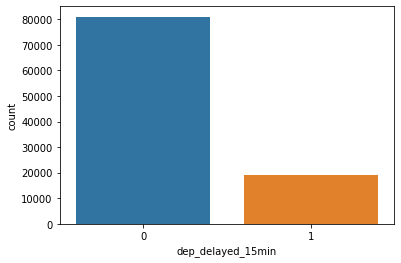

In [72]:
sns.countplot(x="dep_delayed_15min",data=df)

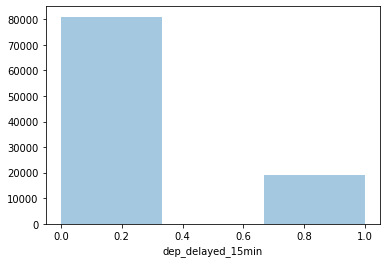

In [73]:
sns.distplot(df['dep_delayed_15min'],kde=False,bins=3)

In [114]:
a = df.corr()

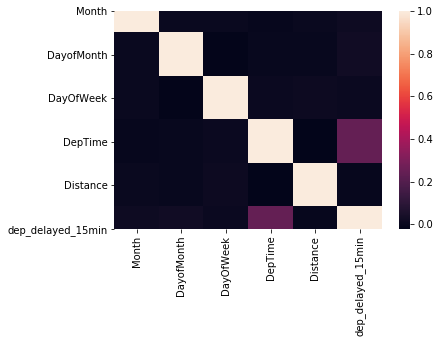

In [115]:
sns.heatmap(a)

In [75]:
#sns.heatmap(df.corr())

In [76]:
#plt.plot(df['dep_delayed_15min'],df['Month'])

In [77]:
Y = df['dep_delayed_15min']

In [78]:
X = df[['Month','DayofMonth','DayOfWeek','Distance']]

In [79]:
model = LinearRegression()

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [81]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
model.coef_

array([ 1.90381363e-03,  1.08916670e-03,  2.38644122e-03, -2.43760567e-06])

In [83]:
metrics.mean_absolute_error(model.predict(X_test),Y_test)

0.30800481828345094

In [84]:
metrics.mean_squared_error(model.predict(X_test),Y_test)

0.15393525834577237

In [85]:
metrics.mean_squared_log_error(model.predict(X_test),Y_test)

0.0757568556885433

In [86]:
metrics.r2_score(model.predict(X_test),Y_test)

-966.2412262399838

In [87]:
model.predict(X_test)

array([0.20052778, 0.22263803, 0.16781767, ..., 0.19037417, 0.19210308,
       0.18512156])

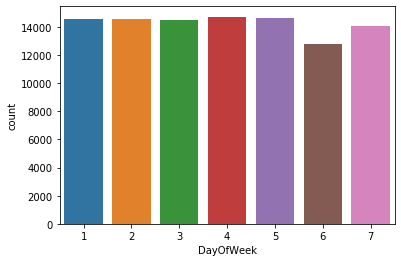

In [88]:
sns.countplot(x="DayOfWeek",data=df)

In [89]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,0
1,4,20,3,1548,US,PIT,MCO,834,0
2,9,2,5,1422,XE,RDU,CLE,416,0
3,11,25,6,1015,OO,DEN,MEM,872,0
4,10,7,6,1828,WN,MDW,OMA,423,1


In [90]:
dfix = df[df['dep_delayed_15min'] == 1]
a = dfix[['UniqueCarrier','dep_delayed_15min']].groupby(['UniqueCarrier']).count()

In [91]:
a

,dep_delayed_15min
UniqueCarrier,
AA,1770
AQ,18
AS,541
B6,393
CO,788
DH,156
DL,1373
EV,1082
F9,156


In [92]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, AA to YV
Data columns (total 1 columns):
dep_delayed_15min    22 non-null int64
dtypes: int64(1)
memory usage: 352.0+ bytes


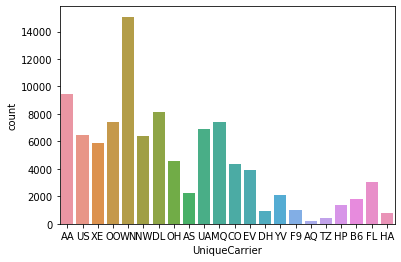

In [93]:
sns.countplot(x='UniqueCarrier', data=df)

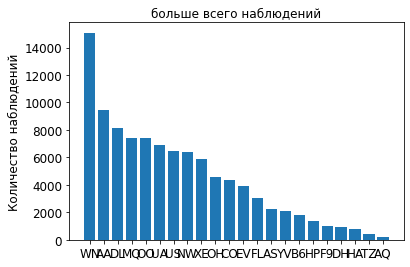

In [94]:
def dict_sort(my_dict):
    keys = []
    values = []
    my_dict = sorted(my_dict.items(), key=lambda x:x[1], reverse=True)
    for k, v in my_dict:
        keys.append(k)
        values.append(v)
    return (keys,values)
count = pd.value_counts(df['UniqueCarrier'].values, sort=True)
keys, values = dict_sort(dict(count))    
TOP = len(keys)
plt.title('больше всего наблюдений', fontsize=12)
plt.bar(np.arange(TOP), values)
plt.xticks(np.arange(TOP), keys, rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Количество наблюдений', fontsize=12)
plt.show()

In [95]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,0
1,4,20,3,1548,US,PIT,MCO,834,0
2,9,2,5,1422,XE,RDU,CLE,416,0
3,11,25,6,1015,OO,DEN,MEM,872,0
4,10,7,6,1828,WN,MDW,OMA,423,1


In [132]:
b = df[['Origin','Dest','Distance']].groupby(['Origin','Dest']).max()

KeyError: "None of [Index(['Origin', 'Dest', 'Distance'], dtype='object')] are in the [columns]"

NameError: name 'DEN' is not defined

In [98]:
df[(df['Origin'] == 'ATL') & (df['Dest'] == 'DFW')]['Distance'].count()

136

In [99]:
df.agg({'Distance': ['min', 'max', 'mean', 'median']})

,Distance
min,30.00000
max,4962.00000
mean,729.39716
median,575.00000


In [100]:
X1 = df['Distance']
x2 = df['dep_delayed_15min']
df.plot(x=X1, y=x2,kind='barh',figsize=(10, 7),title='Top')

KeyError: "None of [Int64Index([ 732,  834,  416,  872,  423,  683, 1035,  596, 1189,  853,\n            ...\n             296,  752,  649,  925,  389,  199,  884, 1076,  140,  605],\n           dtype='int64', length=100000)] are in the [columns]"

In [101]:
df['Origin'].nunique()

289

In [102]:
def Get_Distance(a,b):
    df[df['Origin' == a] & df['Dest' == b]][1]
    

In [103]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
Month                100000 non-null int32
DayofMonth           100000 non-null int32
DayOfWeek            100000 non-null int32
DepTime              100000 non-null int64
UniqueCarrier        100000 non-null object
Origin               100000 non-null object
Dest                 100000 non-null object
Distance             100000 non-null int64
dep_delayed_15min    100000 non-null int64
dtypes: int32(3), int64(3), object(3)
memory usage: 5.7+ MB


In [104]:
a = 'ATL'
b = 'DFW'
Get_Distance(a,b)

KeyError: False

In [106]:
minDist

30

In [112]:
df2 = pd.get_dummies(df,drop_first=False)
df2_delay   = df2[df2.dep_delayed_15min==True]
df2_nodelay = df2[df2.dep_delayed_15min==False]
bin_edges        = np.linspace(0.5,12.5,13)
hist1,bin_edges1 = np.histogram(df2_delay.Month,   bins=bin_edges, density=False)
hist2,bin_edges2 = np.histogram(df2_nodelay.Month, bins=bin_edges, density=False)

In [ ]:
# sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
# sales_df.groupby('Year_of_Release').sum().plot()

In [124]:
df.groupby(['UniqueCarrier'])['dep_delayed_15min'].agg([np.mean]).sort_values(by='mean', ascending=False).T * 100


UniqueCarrier,EV,AS,FL,YV,B6,WN,MQ,UA,AA,CO,...,OO,DL,NW,US,DH,F9,TZ,HP,AQ,HA
mean,27.531807,24.347435,24.218493,22.462406,21.381937,21.343323,19.454521,19.226294,18.793799,18.181818,...,17.280108,16.892224,16.789005,16.738661,16.149068,15.506958,14.349776,14.223512,7.692308,4.330709


In [126]:
days_in_month = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
def day_31_to_365(x):
    days_365 = days_in_month[:x['Month']-1].sum() + x['DayofMonth']
    return days_365

In [127]:
df['DayofMonth'] = df.apply(day_31_to_365,axis = 1)

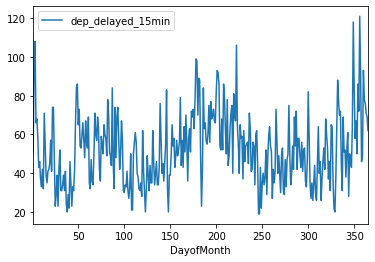

In [128]:
df = df[[x for x in df.columns if 'dep_delayed_15min' in x] + ['DayofMonth']]
df.groupby('DayofMonth').sum().plot()